In [2]:
import numpy as onp
import jax.numpy as jnp
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import mysql.connector

def create_conn(config):
    try:
        connection = mysql.connector.connect(**config)
        print("Connection established")
        return connection
    except mysql.connector.Error as e:
        print(f"Error: {e}")
        return None


config = {
    'user': 'root',
    'password': 'John123##',
    'host': 'localhost',
    'database': 'Nicole_db',
    'raise_on_warnings': True
}

connection = create_conn(config)

Connection established


In [16]:
def get_data(connection):
    cursor = connection.cursor()
    cursor.execute("SELECT * FROM Nicole_table")

    rows = cursor.fetchall()
    for row in rows:
        print(row)

    cursor.close()


if connection:
    get_data(connection)
    # connection.close()


(None, '20.06.2013', 'Female', 'Ugandan')
(None, '20.06.2013', 'Female', 'Ugandan')
(None, '20.06.2013', 'Female', 'Ugandan')
(None, '10.01.2020', 'male', 'Ugandan')


In [5]:
# mycursor = mydb.cursor()
# mycursor.execute("CREATE TABLE fit_params (id INT AUTO_INCREMENT PRIMARY KEY, value INT)")


mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="John123##",
  database="Nicole_db"
)
# Create a cursor object
mycursor = mydb.cursor()

# Execute the DESCRIBE statement
mycursor.execute("DESCRIBE impedance_table2")


# Fetch the column names and print them
columns = [col[0] for col in mycursor.fetchall()]
print(columns)

['id', 'frequency', 'current', 'voltage', 'real_part', 'imag_part']


In [12]:
file_path = "/home/mugisa/Desktop/HER/her/data/Z_her.npy"
impedance_data= onp.load(file_path, allow_pickle=True)

popt_path = "/home/mugisa/Desktop/HER/her/data/popt.npy"
popt= onp.load(popt_path, allow_pickle=True)

V_path= "/home/mugisa/Desktop/HER/her/data/V.npy"
voltage_data = onp.load(V_path, allow_pickle="True")
print(voltage_data.shape)


I_path= "/home/mugisa/Desktop/HER/her/data/I.npy"
current_data = onp.load(I_path, allow_pickle=True)
print(current_data.shape)
frequency_data_path= "/home/mugisa/Desktop/HER/her/data/F_her.npy"
frequency_data = onp.load(frequency_data_path, allow_pickle=True)


(50,)
(50,)


In [6]:
a=onp.load("/home/mugisa/Desktop/HER/her/data/V.npy", allow_pickle="True")
a

array([-0.54757345, -0.5527073 , -0.55785155, -0.56300557, -0.56816804,
       -0.57333755, -0.57851267, -0.58369136, -0.58887184, -0.5940529 ,
       -0.59923315, -0.6044117 , -0.6095879 , -0.6147612 , -0.6199316 ,
       -0.6250992 , -0.63026386, -0.63542634, -0.6405872 , -0.6457466 ,
       -0.65090543, -0.65606385, -0.66122234, -0.6663815 , -0.6715411 ,
       -0.6767016 , -0.68186295, -0.6870253 , -0.69218814, -0.6973516 ,
       -0.70251524, -0.7076789 , -0.71284235, -0.71800506, -0.7231673 ,
       -0.7283288 , -0.7334894 , -0.7386492 , -0.7438088 , -0.7489679 ,
       -0.75412726, -0.7592875 , -0.7644486 , -0.7696117 , -0.77477694,
       -0.7799449 , -0.78511584, -0.79028994, -0.79546684, -0.8006466 ],
      dtype=float32)

In [19]:
mydata=popt
mycursor = mydb.cursor()
mydata=popt
# mydata = mydata.numpy()
mydata = onp.array(popt)
print("Type of mydata:", type(mydata))
print("Shape of mydata:", mydata.shape)
# Define the SQL statement
num_cols = 50
sql = "INSERT INTO mytable ("
for i in range(num_cols):
    sql += "col" + str(i+1) + ","
sql = sql[:-1] + ") VALUES ("
for i in range(num_cols):
    sql += "%s,"
sql = sql[:-1] + ")"

# Insert the data in batches
batch_size = 50
num_rows = mydata.shape[0]
num_batches = int(onp.ceil(num_rows / batch_size))
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min((i+1) * batch_size, num_rows)
    batch_data = mydata[start_idx:end_idx,:]
    mycursor.executemany(sql, batch_data.tolist())
    mydb.commit()
# Close the database connection
mydb.close()

Type of mydata: <class 'numpy.ndarray'>
Shape of mydata: (9, 50)


In [20]:
z=loaded_Z_her
mycursor = mydb.cursor()

# mydata = mydata.numpy()
mydata = onp.array(popt)
print("Type of mydata:", type(z))
print("Shape of mydata:", z.shape)
# Define the SQL statement
num_cols = 50
sql = "INSERT INTO mytable ("
for i in range(num_cols):
    sql += "col" + str(i+1) + ","
sql = sql[:-1] + ") VALUES ("
for i in range(num_cols):
    sql += "%s,"
sql = sql[:-1] + ")"

# Insert the data in batches
batch_size = 50
num_rows = mydata.shape[0]
num_batches = int(onp.ceil(num_rows / batch_size))
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min((i+1) * batch_size, num_rows)
    batch_data = mydata[start_idx:end_idx,:]
    mycursor.executemany(sql, batch_data.tolist())
    mydb.commit()
# Close the database connection
mydb.close()

OperationalError: MySQL Connection not available.

In [ ]:
import jax.numpy as jnp
import numpy as np

# Convert popt to a NumPy array
# mydata = jnp.array(popt)
# mydata = mydata.numpy()
mydata = np.array(popt)
print("Type of popt:", type(mydata))
print("Shape of popt:", mydata.shape)
# Create a cursor object
mycursor = mydb.cursor()

# Define the SQL statement
num_cols = mydata.shape[1]
sql = "INSERT INTO myarray  ("
for i in range(num_cols):
    sql += "value" + str(i+1) + ","
sql = sql[:-1] + ") VALUES ("
for i in range(num_cols):
    sql += "%s,"
sql = sql[:-1] + ")"

# Insert the data in batches
batch_size = 50
num_rows = mydata.shape[0]
num_batches = int(np.ceil(num_rows / batch_size))
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min((i+1) * batch_size, num_rows)
    batch_data = mydata[start_idx:end_idx,:]
    mycursor.executemany(sql, batch_data.tolist())
    mydb.commit()

# Close the database connection
mydb.close()

In [9]:
# saving multiple files in mysql
import numpy as np
import mysql.connector

# Connect to the MySQL database
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="John123##",
    database="Nicole_db"
)

# Create a cursor object
mycursor = mydb.cursor()

# Sample impedance, frequency, and voltage data
impedance_data = np.random.rand(35, 50) + 1j * np.random.rand(35, 50)
frequency_data = np.random.rand(35, 1)
voltage_data = np.random.rand(50)
current_data = np.random.rand(50)

# Create a new table for the impedance data
mycursor.execute(
    "CREATE TABLE impedance_table2 (id INT AUTO_INCREMENT PRIMARY KEY, frequency FLOAT,  real_part FLOAT, imag_part FLOAT)")

# Insert the impedance data into the table
batch_size = 50
num_rows = impedance_data.shape[0]
num_batches = int(np.ceil(num_rows / batch_size))
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min((i+1) * batch_size, num_rows)
    batch_impedance = impedance_data[start_idx:end_idx, :]
    batch_frequency = frequency_data[start_idx:end_idx, :]
    for j in range(batch_impedance.shape[0]):
        for k in range(batch_impedance.shape[1]):
            sql = "INSERT INTO impedance_table2 (frequency, real_part, imag_part) VALUES (%s, %s, %s)"
            val = (float(batch_frequency[j]), float(
                batch_impedance[j, k].real), float(batch_impedance[j, k].imag))
            mycursor.execute(sql, val)

# Create a new table for the parameter data
mycursor.execute("CREATE TABLE parameter_table2 (id INT AUTO_INCREMENT PRIMARY KEY, current FLOAT, voltage FLOAT, " +
                 "param1 FLOAT, param2 FLOAT, param3 FLOAT, param4 FLOAT, param5 FLOAT, param6 FLOAT, param7 FLOAT, param8 FLOAT, param9 FLOAT)")

# Insert the parameter data into the table
batch_size = 50
num_rows = popt.shape[0]
num_batches = int(np.ceil(num_rows / batch_size))
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min((i+1) * batch_size, num_rows)
    batch_data = popt[start_idx:end_idx, :]
    for j in range(batch_data.shape[0]):
        sql = "INSERT INTO parameter_table2 (current, voltage, param1, param2, param3, param4, param5, param6, param7, param8, param9) " + \
              "VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
        val = (float(current_data[j]), float(voltage_data[j]), float(batch_data[j, 0]), float(batch_data[j, 1]),
               float(batch_data[j, 2]), float(batch_data[j, 3]), float(
                   batch_data[j, 4]), float(batch_data[j, 5]),
               float(batch_data[j, 6]), float(batch_data[j, 7]), float(batch_data[j, 8]))
        mycursor.execute(sql, val)

# Commit the changes and close the connection
mydb.commit()
# mydb.close()


NameError: name 'popt' is not defined

In [13]:
import numpy as np
import mysql.connector

# Connect to the MySQL database
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="John123##",
  database="Nicole_db"
)

# Create a cursor object
mycursor = mydb.cursor()

# Sample impedance, frequency, voltage, current, and parameter data
# impedance_data = onp.random.rand(35, 50) + 1j * onp.random.rand(35, 50)
# frequency_data = onp.random.rand(35, 1)
# voltage_data = onp.random.rand(50)
# current_data = onp.random.rand(50)
# popt = onp.random.rand(9, 50)

# Create a new table for the impedance data
mycursor.execute("CREATE TABLE impedance_table2 (id INT AUTO_INCREMENT PRIMARY KEY, frequency FLOAT, real_part FLOAT, imag_part FLOAT)")

# Insert the impedance data into the table
batch_size = 50
num_rows = impedance_data.shape[0]
num_batches = int(np.ceil(num_rows / batch_size))
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min((i+1) * batch_size, num_rows)
    batch_impedance = impedance_data[start_idx:end_idx,:]
    batch_frequency = frequency_data[start_idx:end_idx,:]
    for j in range(batch_impedance.shape[0]):
        for k in range(batch_impedance.shape[1]):
            sql = "INSERT INTO impedance_table2 (frequency,real_part, imag_part) VALUES (%s, %s, %s)"
            val = (float(batch_frequency[j][0]), float(batch_impedance[j,k].real), float(batch_impedance[j,k].imag))
            mycursor.execute(sql, val)

# Create a new table for the parameter data
mycursor.execute("CREATE TABLE parameter_table2 (id INT AUTO_INCREMENT PRIMARY KEY, current FLOAT, voltage FLOAT, " +
                 "param1 FLOAT, param2 FLOAT, param3 FLOAT, param4 FLOAT, param5 FLOAT, param6 FLOAT, param7 FLOAT, param8 FLOAT, param9 FLOAT)")

# Insert the parameter data into the table
batch_size = 50
num_rows = popt.shape[1]
num_batches = int(np.ceil(num_rows / batch_size))
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min((i+1) * batch_size, num_rows)
    batch_data = popt[:, start_idx:end_idx]
    for j in range(batch_data.shape[1]):
        sql = "INSERT INTO parameter_table2 (current, voltage, param1, param2, param3, param4, param5, param6, param7, param8, param9) " + \
              "VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
        val = (float(current_data[j]), float(voltage_data[j]), float(batch_data[0,j]), float(batch_data[1,j]),
               float(batch_data[2,j]), float(batch_data[3,j]), float(batch_data[4,j]), float(batch_data[5,j]),
               float(batch_data[6,j]), float(batch_data[7,j]), float(batch_data[8,j]))
        mycursor.execute(sql, val)


# Commit the changes and close the connection
mydb.commit()
# mydb.close()


In [13]:
#reading back the data
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="John123##",
  database="Nicole_db"
)

# Create a cursor object
mycursor = mydb.cursor()
mycursor.execute("DESCRIBE impedance_table2")

# Fetch the column names and print them
columns = [col[0] for col in mycursor.fetchall()]
print(columns)

['id', 'frequency', 'real_part', 'imag_part']


In [14]:
#reading back the data
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="John123##",
  database="Nicole_db"
)

# Create a cursor object
mycursor = mydb.cursor()
mycursor.execute("DESCRIBE parameter_table2")

# Fetch the column names and print them
columns = [col[0] for col in mycursor.fetchall()]
print(columns)

['id', 'current', 'voltage', 'param1', 'param2', 'param3', 'param4', 'param5', 'param6', 'param7', 'param8', 'param9']


In [17]:
# retrieving impedance_data
# Create a cursor object
mycursor = mydb.cursor()

# Retrieve the impedance data
mycursor.execute("SELECT real_part, imag_part FROM impedance_table2")
result = mycursor.fetchall()
impedance_data = onp.array([complex(r[0], r[1]) for r in result])
num_rows = 35
num_cols = 50

# Given the flattened array of complex numbers
impedance_data = onp.array([complex(r[0], r[1]) for r in result])

# Reshape the flattened array to the original shape
impedance_matrix = impedance_data.reshape(num_rows, num_cols)


mycursor.execute("SELECT voltage FROM parameter_table2")
result = mycursor.fetchall()
voltage = onp.array([r[0] for r in result])

# Retrieve the frequency data
mycursor.execute("SELECT frequency FROM impedance_table2")
result = mycursor.fetchall()
frequency = onp.array([r[0] for r in result])

mycursor.execute("SELECT current FROM parameter_table2")
result = mycursor.fetchall()
current = onp.array([r[0] for r in result])
print(impedance_matrix)

[[27401.5 -38221.8j   27654.5 -37049.3j   27961.7 -35725.9j   ...
  19567.7  -6504.45j  19846.2  -6841.12j  20152.4  -7216.17j ]
 [13186.1 -18631.9j   13261.  -18353.8j   13362.9 -18051.9j   ...
  14734.4  -6823.59j  14803.   -7018.54j  14876.1  -7235.85j ]
 [ 9837.29-13087.1j    9865.79-12939.3j    9909.51-12783.7j   ...
  12189.9  -6695.95j  12212.7  -6820.88j  12235.2  -6960.13j ]
 ...
 [ 1738.06  -173.703j  1738.04  -173.67j   1738.04  -173.652j ...
   1689.02  -176.521j  1687.1   -176.741j  1685.22  -176.959j]
 [ 1722.85  -154.492j  1723.04  -154.371j  1723.2   -154.314j ...
   1674.02  -158.268j  1672.03  -158.272j  1670.05  -158.274j]
 [ 1706.49  -142.211j  1706.54  -142.057j  1706.6   -141.915j ...
   1658.03  -142.141j  1656.06  -142.179j  1654.1   -142.221j]]


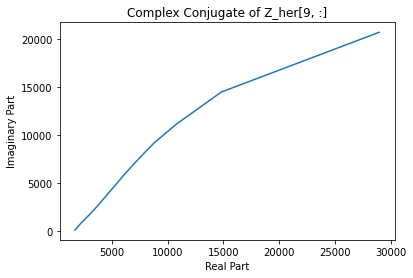

In [18]:
Z_her_conj = onp.conj(impedance_matrix[:,10])  # Python uses 0-based indexing, so the 10th row is at index 9

# Complex conjugate plot
plt.figure()
plt.plot(Z_her_conj.real, Z_her_conj.imag)
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Complex Conjugate of Z_her[9, :]')
plt.show()

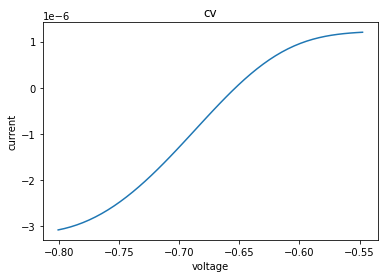

In [19]:
plt.figure()
plt.plot(voltage, current)
plt.xlabel('voltage')
plt.ylabel('current')
plt.title('cv')
plt.show()

In [ ]:
Z_her_conj = onp.conj(Z_her[:,10])  # Python uses 0-based indexing, so the 10th row is at index 9

# Complex conjugate plot
plt.figure()
plt.plot(Z_her_conj.real, Z_her_conj.imag)
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Complex Conjugate of Z_her[9, :]')
plt.show()


In [2]:
import mysql.connector

def create_conn(config):
    try:
        connection = mysql.connector.connect(**config)
        print("Connection established")
        return connection
    except mysql.connector.Error as e:
        print(f"Error: {e}")
        return None


config = {
    'user': 'root',
    'password': 'John123##',
    'host': 'localhost',
    'database': 'Nicole_db',
    'raise_on_warnings': True
}

connection = create_conn(config)

Connection established


In [10]:
# Connect to the MySQL database
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="John123##",
  database="Nicole_db"
)


mycursor = mydb.cursor()

# mycursor.execute("SHOW TABLES") #show the table
# mycursor.execute("DELETE FROM impedance_table") #clearing the table

sql = "DROP TABLE impedance_table2"  #deleting the table
mycursor.execute(sql) #deleting the table
mydb.commit() #deleting the table
# tables = mycursor.fetchall()  #show the table
# print(tables)   #show the table

In [11]:
# Connect to the MySQL database
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="John123##",
  database="Nicole_db"
)


mycursor = mydb.cursor()

# mycursor.execute("SHOW TABLES") #show the table
# mycursor.execute("DELETE FROM impedance_table") #clearing the table

sql = "DROP TABLE parameter_table2"  #deleting the table
mycursor.execute(sql) #deleting the table
mydb.commit() #deleting the table
# tables = mycursor.fetchall()  #show the table
# print(tables)   #show the table